# SPRINT6　　Unsupervised Learning

### 教師なし学習とは

モデルを学習させるときに、正解が事前にわかっている教師あり学習に対して、  
教師なし学習は正解が無いデータを扱うことであり、データの構造を調べて意味のある情報を取り出すことができる。

具体的には
- 購買記録から顧客を分類し、販売戦略を考える
- アンケートなどの文章を分類し、どういった内容のものがあるか見る
- 不良品を分類し、工程の管理方法を考える

### データ取得

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from warnings import filterwarnings
filterwarnings('ignore')

In [29]:
#csvを読み込むコードを記述
data = pd.read_csv("input/Wholesale customers data.csv")
display(data.head())
display(data.shape)
display(data.info())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


None

In [30]:
print("サンプルの数：{} 　特徴量の数：{}\n".format(*data.shape))
print("各特徴量の型\n",data.dtypes,"\n")
print("統計量の要約")
display(data.describe())
display(data.head())

サンプルの数：440 　特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 

統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [31]:
#元のデータはdata_originalに格納しておく
data_original = data.copy()

### 不要な特徴量を消す
ChannelとRegionを消し、年間の購入金額についての6つの特徴量だけを使う

In [32]:
data=data.drop(["Channel","Region"],axis=1)
display(data.head())
display(data.shape)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


(440, 6)

### scatter matrixを描く
大半の顧客は支出が少ないが、かなり多く支出している顧客も少数いる  
また、多くの特徴量同士は無相関だが一部に相関関係が見られる

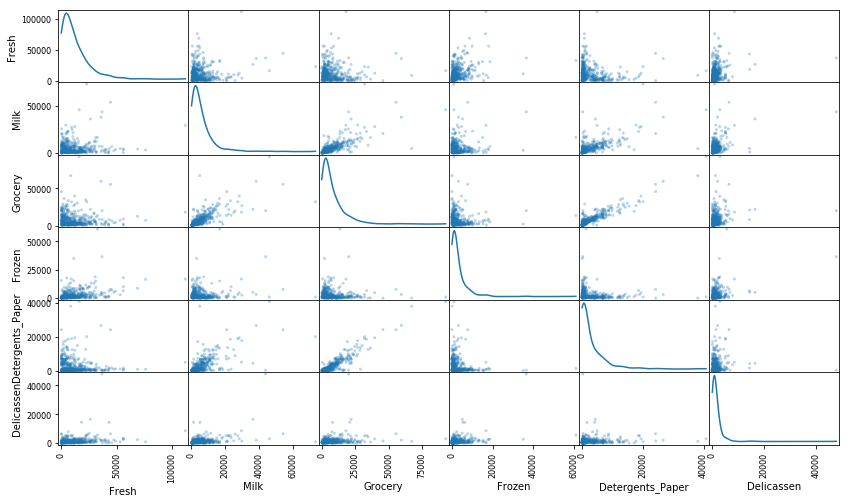

In [33]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

## Feature Scaling
### Feature Scalingの実行

In [34]:
#dataに対して適切なFeature Scalingを行うコードを記述
data_fs=np.log(data)
data_fs.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


### なぜFeature Scalingが必要なのか記述せよ

答え：特徴ごとのスケールが異なる場合、学習結果がスケールの大きい特徴の影響を強く受けてしまうため、Feature Scalingによってスケールを  
　　　均一化しておく必要がある。

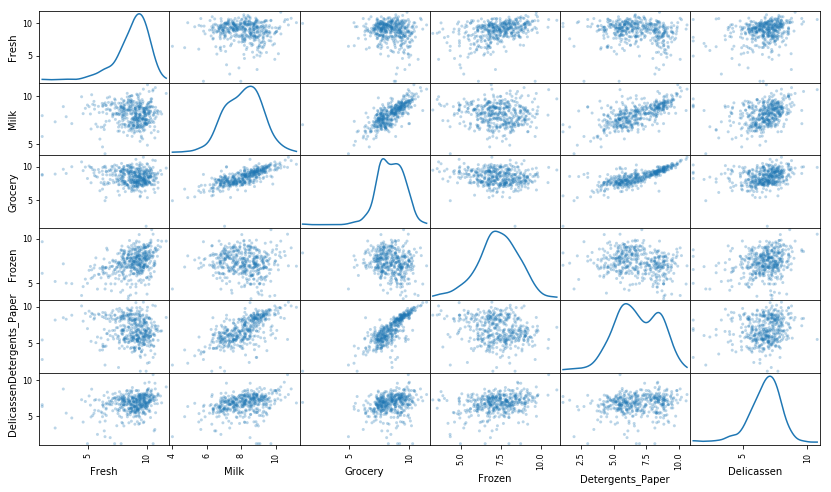

In [35]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
plt.show()

## Feature Extraction
### PCAの実行


In [36]:
#data_fsに対しPCAを行い分散説明率の累積を確認
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data_fs)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_ratio_ 

array([0.44237417, 0.27657107, 0.11617342, 0.09617719, 0.0457568 ,
       0.02294735])

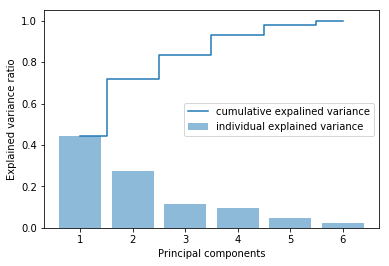

In [38]:
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [39]:
#分散説明率が70%を超える数の主成分を選び、data_pcaに格納する(第２主成分まで)
pca = PCA(n_components=2)
pca.fit(data_fs)
data_pca = pca.components_
data_pca


array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

In [40]:
data_pca=pca.transform(data_fs)
#data_pca

### なぜPCAを行うのか記述せよ  
機械学習の前処理としてなぜPCAが必要なのか

答え：PCAを行うと特徴量の次元を削減することができる。これによって、情報量を大きく損なうことなく学習データ量を減らすことができる。    
　　　また、高次元データのまま学習に用いると、汎用性に乏しい特異なパターンを学習するリスクが高くなるが、PCAの次元削減によって  
　　　そのリスクを減らすことができる。

### クラスタリングとは何か記述せよ  
・いつ何に使うのか  
・階層的手法と非階層的手法との違い  
・クラス分類（classification）との比較  

答え：クラスタリングとは、複数のデータを特徴が似たデータ同士のグループに分ける時に用いる教師なし学習の手法。   
　 　 階層的手法と非階層的手法の違いは、前者が事前にグループ数を指定せず、後者は指定をするという点である。  
　 　クラス分類との違いは、どういう特徴ごとにグループを分けるかが予め決まっていないという点である。

### 樹状図を描く  
階層的手法（ward法）を使い、樹状図を描く

In [41]:
data_fs.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


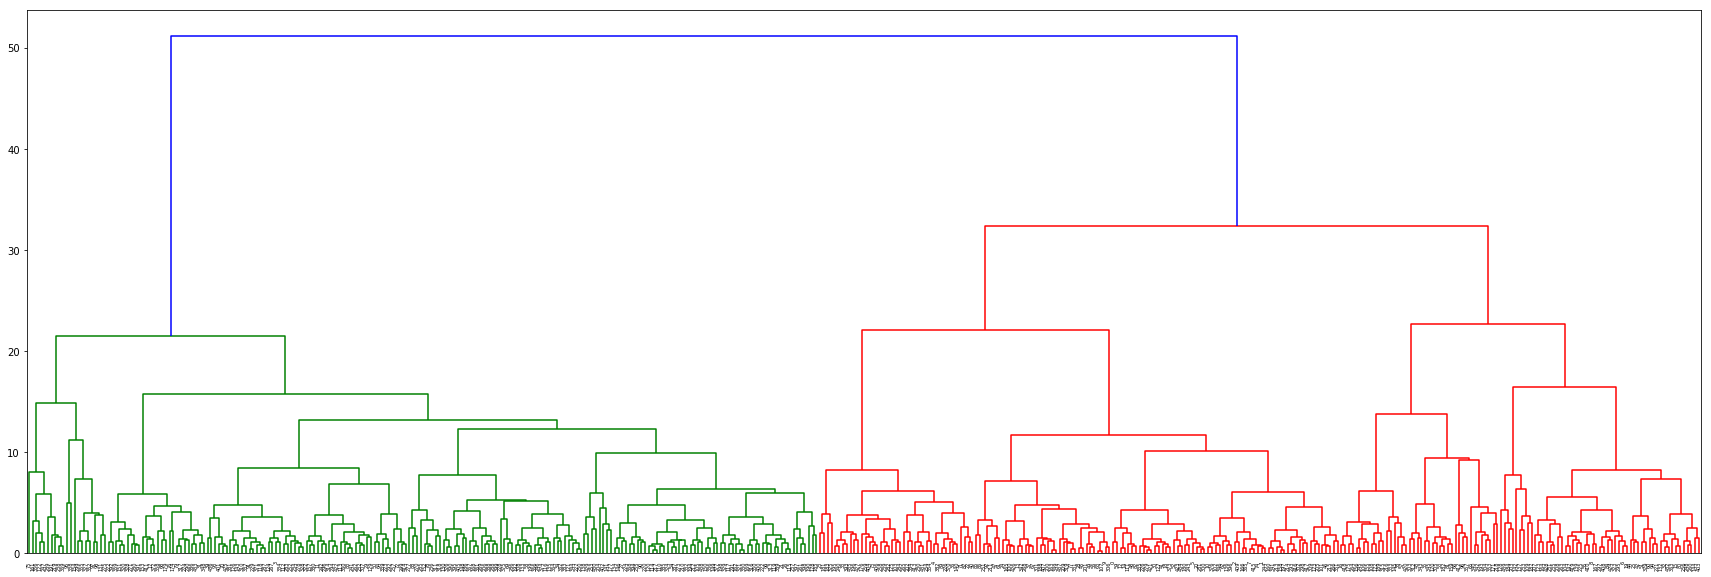

In [16]:
from scipy.cluster.hierarchy import dendrogram,ward,leaves_list,linkage
fig = plt.figure(figsize=(30,10)) 

affinity = 'ward'
Z = linkage(data_fs, affinity)
dn=dendrogram(Z)
plt.show()

### k-meansにおけるkの値の検討  

### エルボー法

In [26]:
from sklearn.cluster import KMeans

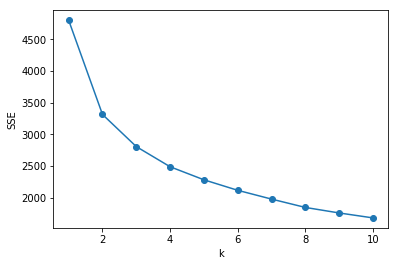

In [42]:
# SSE
SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_fs)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

エルボー法の結果から、線の傾きの変化がk=2の前後で最も大きいためk=2を最有力候補とする

### シルエット法

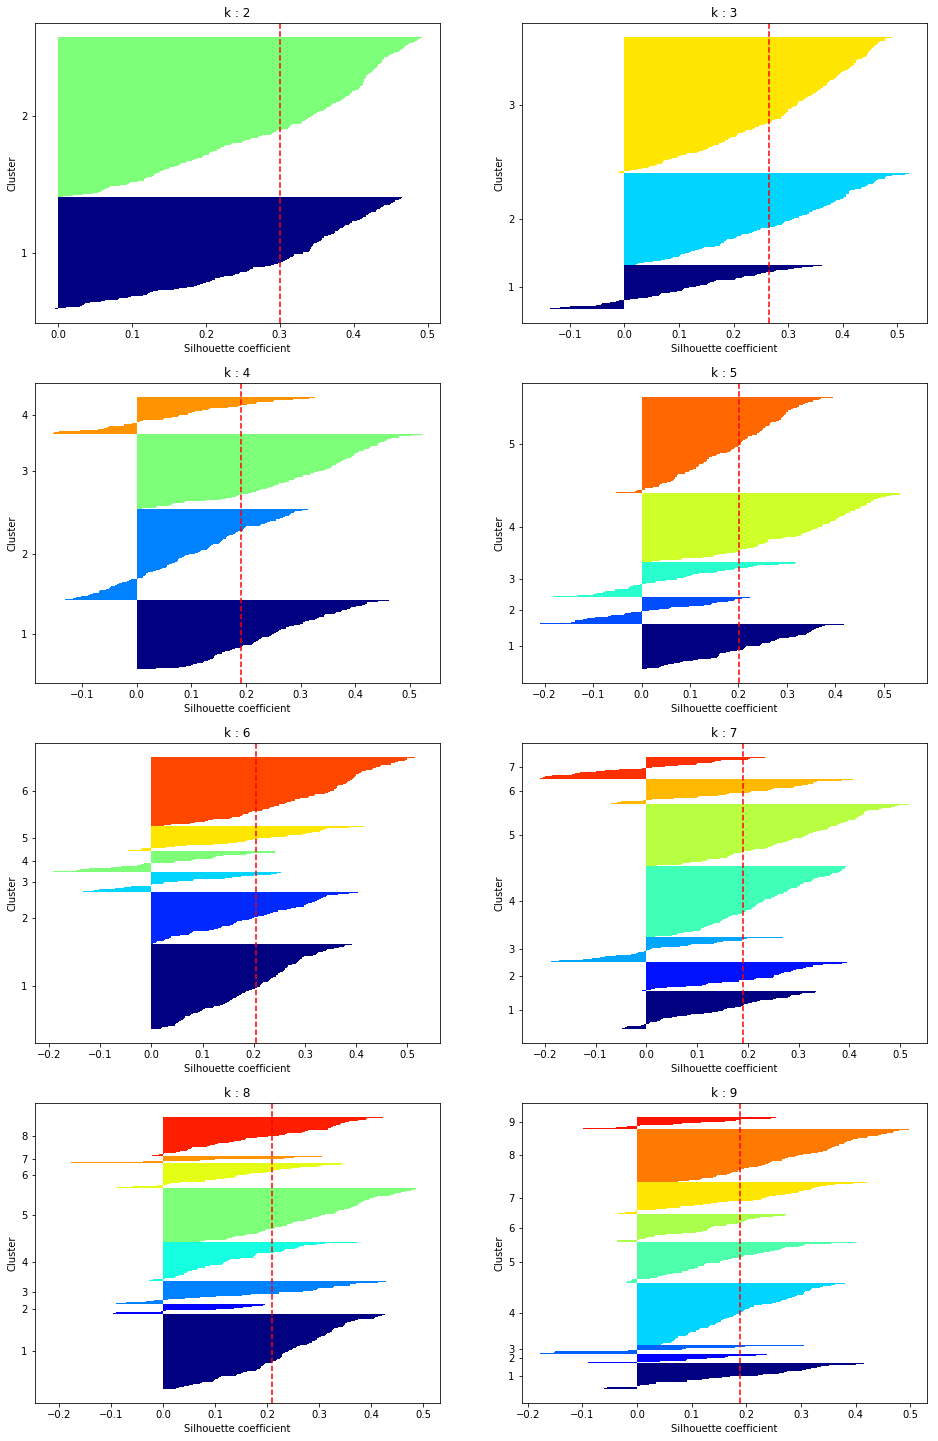

In [19]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

plt.figure(figsize=(16, 32))
for i0 in range(1, 9):
    km = KMeans(n_clusters=i0+1, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(data_fs)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_fs, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.subplot(5,2,i0)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
        
    plt.title("k : "+ str(i+1))
        #plt.plot(x, y1)
        
        
plt.show()

シルエット法の結果から、k=2の時の各クラスターの形状が最もよく似ているためk=2を最有力候補とする

### k-meansの実行
決定したkの値を使い、k-meansを行う

In [92]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km.fit(data_fs)
y_km = km.predict(data_fs)

display(y_km)
display(y_km.size)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

440

### クラスタリングの可視化

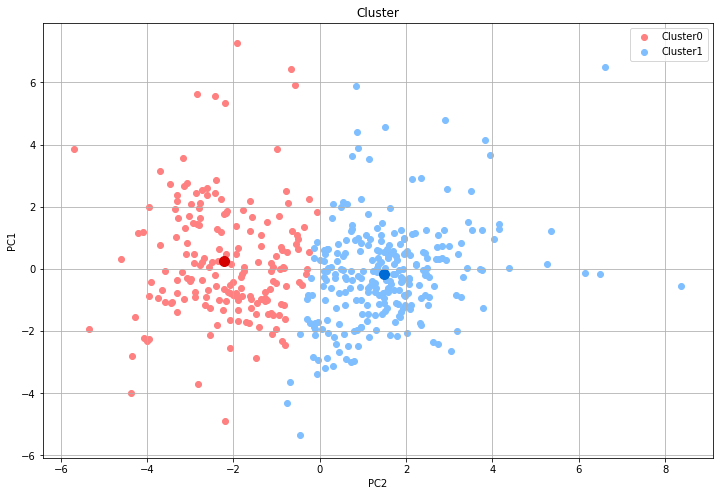

In [44]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km.fit(data_pca)

zero=data_pca[y_km==0]
one=data_pca[y_km==1]

plt.figure(figsize =(12,8))
plt.scatter(zero[:,0], zero[:,1], c="#ff8080", label='Cluster0')
plt.scatter(one[:,0], one[:,1], c="#80bfff", label='Cluster1')
plt.scatter(km.cluster_centers_[1][0],km.cluster_centers_[1][1],s=100, c='#d50000')
plt.scatter(km.cluster_centers_[0][0],km.cluster_centers_[0][1],s=100, c='#006ad5')
plt.title('Cluster')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend()
plt.grid()
plt.show()

### 既知のグループとの比較

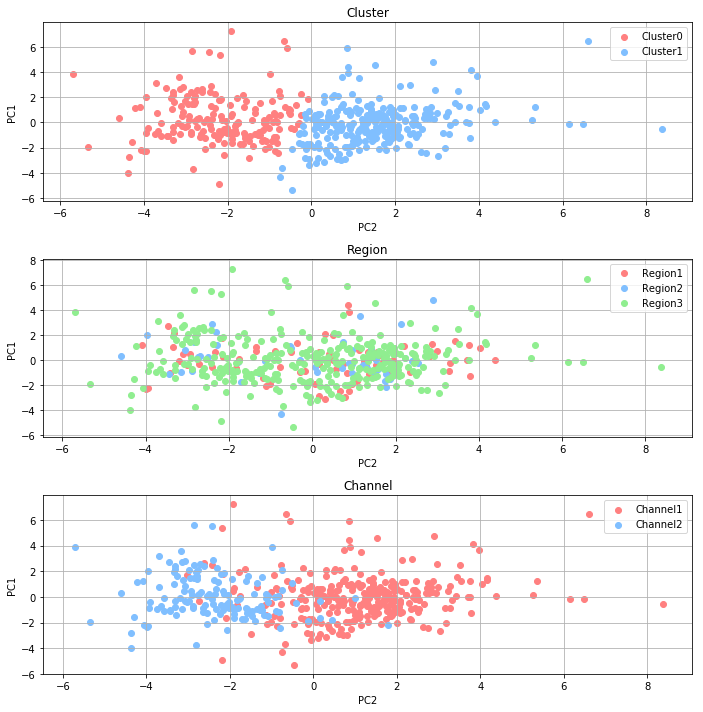

In [103]:
fig = plt.figure(figsize =(10,10))

zero=data_pca[y_km==0]
one=data_pca[y_km==1]
plt.subplot(3,1,1)
plt.scatter(zero[:,0], zero[:,1], c="#ff8080", label='Cluster0')
plt.scatter(one[:,0], one[:,1], c="#80bfff", label='Cluster1')
plt.title('Cluster')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend()
plt.grid()


R1 = data_pca[(data_original["Region"]==1)]
R2 = data_pca[(data_original["Region"]==2)]
R3 = data_pca[(data_original["Region"]==3)]
plt.subplot(3,1,2)
plt.scatter(R1[:,0], R1[:,1], c="#ff8080", label='Region1')
plt.scatter(R2[:,0], R2[:,1], c="#80bfff", label='Region2')
plt.scatter(R3[:,0], R3[:,1], c="lightgreen", label='Region3')
plt.title('Region')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend()
plt.grid()


C1 = data_pca[(data_original["Channel"]==1)]
C2 = data_pca[(data_original["Channel"]==2)]
plt.subplot(3,1,3)
plt.scatter(C1[:,0], C1[:,1], c="#ff8080", label='Channel1')
plt.scatter(C2[:,0], C2[:,1], c="#80bfff", label='Channel2')
plt.title('Channel')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.legend()
plt.grid()


fig.tight_layout()
plt.show()

#### 比較結果

今回作ったクラスタとRegionのグループに共通性は見られないが、Channelグループとの間にはある程度の共通性が見られる  
特に、クラスタ１の顧客のほぼ全てがChannel１に属していることがわかる

#### 業者への報告のための追加分析

In [86]:
df_channel=pd.read_csv("input/Wholesale customers data.csv")["Channel"]
df_region=pd.read_csv("input/Wholesale customers data.csv")["Region"]

In [87]:
# 合計金額列追加
data_modify = pd.concat([data,pd.DataFrame(data.sum(axis=1),columns=['Total'])],axis=1)
data_modify["Channel"]=df_channel
data_modify["Region"]=df_region
data_modify["class"]=y_km
display(data_modify.head())
display(data_modify.shape)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Channel,Region,class
0,12669,9656,7561,214,2674,1338,34112,2,3,0
1,7057,9810,9568,1762,3293,1776,33266,2,3,0
2,6353,8808,7684,2405,3516,7844,36610,2,3,0
3,13265,1196,4221,6404,507,1788,27381,1,3,1
4,22615,5410,7198,3915,1777,5185,46100,2,3,0


(440, 10)

In [88]:
data_class0=data_modify[data_modify["class"]==0]
display(data_class0.head())
display(data_class0.shape)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Channel,Region,class
0,12669,9656,7561,214,2674,1338,34112,2,3,0
1,7057,9810,9568,1762,3293,1776,33266,2,3,0
2,6353,8808,7684,2405,3516,7844,36610,2,3,0
4,22615,5410,7198,3915,1777,5185,46100,2,3,0
5,9413,8259,5126,666,1795,1451,26710,2,3,0


(182, 10)

In [89]:
data_class1=data_modify[data_modify["class"]==1]
display(data_class1.head())
display(data_class1.shape)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Channel,Region,class
3,13265,1196,4221,6404,507,1788,27381,1,3,1
11,13146,1124,4523,1420,549,497,21259,2,3,1
15,10253,1114,3821,397,964,412,16961,1,3,1
17,5876,6157,2933,839,370,4478,20653,1,3,1
21,5567,871,2010,3383,375,569,12775,1,3,1


(258, 10)

In [94]:
copy_class1 = np.log(data_class1)

In [95]:
copy_class1 = copy_class1.drop(["class"],axis=1)

最初のクラスタリングでクラスタ１に属していた顧客（クラスタ１）をさらに２クラスタに分ける

In [97]:
km1 = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km1 = km.fit_predict(copy_class1)
print(y_km1)
y_km1.shape

[0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1
 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1
 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1
 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0
 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1]


(258,)

In [98]:
zero=data_class1[y_km1==0]
one=data_class1[y_km1==1]

このクラスタリングでクラスタ０に分類された顧客145社をクラスタ１−０と呼ぶことにする

In [99]:
zero.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Channel,Region,class
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.0
mean,19375.448276,3905.737931,4147.800000,6027.600000,553.255172,1991.096552,36000.937931,1.041379,2.496552,1.0
std,14010.629002,4757.360062,3299.917041,7134.002375,474.411840,4177.769975,22836.483339,0.199856,0.800383,0.0
min,717.000000,489.000000,593.000000,155.000000,20.000000,64.000000,13977.000000,1.000000,1.000000,1.0
25%,9351.000000,1642.000000,2124.000000,2198.000000,235.000000,743.000000,22287.000000,1.000000,2.000000,1.0
50%,16936.000000,2567.000000,3135.000000,3975.000000,411.000000,1163.000000,29000.000000,1.000000,3.000000,1.0
75%,25962.000000,4411.000000,5034.000000,7888.000000,764.000000,2165.000000,43784.000000,1.000000,3.000000,1.0
max,76237.000000,43950.000000,20170.000000,60869.000000,3593.000000,47943.000000,185683.000000,2.000000,3.000000,1.0


このクラスタリングでクラスタ１に分類された顧客113社をクラスタ１−１と呼ぶことにする

In [100]:
one.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,Channel,Region,class
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0,113.000000,113.0
mean,7844.522124,1701.185841,2085.902655,1720.761062,336.796460,566.061947,14255.230088,1.0,2.522124,1.0
std,7743.226608,1539.042139,1462.756735,2022.767055,510.233528,483.396268,8400.216119,0.0,0.802867,0.0
min,3.000000,55.000000,3.000000,47.000000,3.000000,3.000000,904.000000,1.0,1.000000,1.0
25%,2615.000000,735.000000,1172.000000,547.000000,83.000000,247.000000,9596.000000,1.0,2.000000,1.0
50%,6338.000000,1137.000000,1799.000000,1103.000000,222.000000,409.000000,12412.000000,1.0,3.000000,1.0
75%,10253.000000,2160.000000,2510.000000,2181.000000,397.000000,749.000000,17368.000000,1.0,3.000000,1.0
max,42786.000000,8323.000000,8253.000000,15601.000000,4762.000000,2501.000000,55459.000000,1.0,3.000000,1.0


### 業者への報告内容

### クラスタ０
データ数：182（Horeca：　46、Retail：136）  
年間購買額が高い傾向（42794ユーロ）  
乳製品（3.35倍）  
食料品（4.5倍）  
洗剤および紙製品（13.8倍）  
→提案①: 洗剤および紙製品を主軸に、乳製品・食料品の情報を掲載したチラシやDMを送るといったマーケティング戦略をとってはどうか

### クラスタ１
データ数：258（Horeca：252、Retail：6）  
年間購買額が低い傾向（26476ユーロ）  
生鮮食品（1.65倍）  
冷凍食品（2.66倍）  
 
### クラスタ１−０
データ数：145  
年間購買額が高い傾向（36000ユーロ）  
→提案②: 生鮮食品・冷凍食品の情報を掲載したチラシやDMを送るといったマーケティング戦略をとってはどうか
 

### クラスタ１−１
データ数：113  
年間購買額が低い傾向（14255ユーロ）  


※デリカテッセン製品の差はない  
※全データ数：440